<a href="https://colab.research.google.com/github/JSEFERINO/JHSERIES2/blob/main/04_Series_Tiempo_Cap2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Curso Introductorio Series de Tiempo por Julio Hurtado Márquez**
## **Text: Time Series Forecasting in Python - MARCO PEIXEIRO**
## **Capítulo 2. Una ingenua predicción del futuro**

# **Introducción**
+ Definición de un modelo de referencia
+ Establecer una línea de base usando la media
+ Construir una línea de base utilizando la media de la ventana de tiempo anterior
+ Crear una línea de base utilizando el paso de tiempo anterior
Implementando el ingenuo pronóstico estacional.

## **Predicción ingenua del futuro**
+ Primero aprenderá a hacer una predicción ingenua del futuro, que le servirá como punto de referencia.
+ **El modelo de referencia** es una solución trivial que utiliza heurísticas o estadísticas simples para calcular un pronóstico.
+ Desarrollar un modelo de referencia no siempre es una ciencia exacta.
+ A menudo requerirá cierta intuición que obtendremos al visualizar los datos y detectar patrones que pueden usarse para hacer predicciones.
+ En cualquier proyecto de modelado, es importante tener una línea de base, ya que puede usarla para comparar el rendimiento de los modelos más complejos que construirá en el futuro.
+ La única forma de saber si un modelo es bueno o eficaz es compararlo con una línea de base.

En este capítulo, imaginemos que deseamos predecir las ganancias trimestrales por acción (EPS) de Johnson & Johnson. Podemos observar el conjunto de datos de la figura 2.1, que es idéntico a lo que vio en el capítulo 1. Específicamente, usaremos los datos desde 1960 hasta finales de 1979 para predecir el EPS para los cuatro trimestres de 1980. El pronóstico El período se ilustra mediante la zona gris en la figura 2.1.

**Figura 2.1 Ganancias trimestrales por acción de Johnson & Johnson en dólares estadounidenses (USD) entre 1960 y 1980. Usaremos los datos desde 1960 hasta el último trimestre de 1979 para construir un modelo de referencia que pronosticará las ganancias por acción para los trimestres de 1980 (como se ilustra en el área gris).**

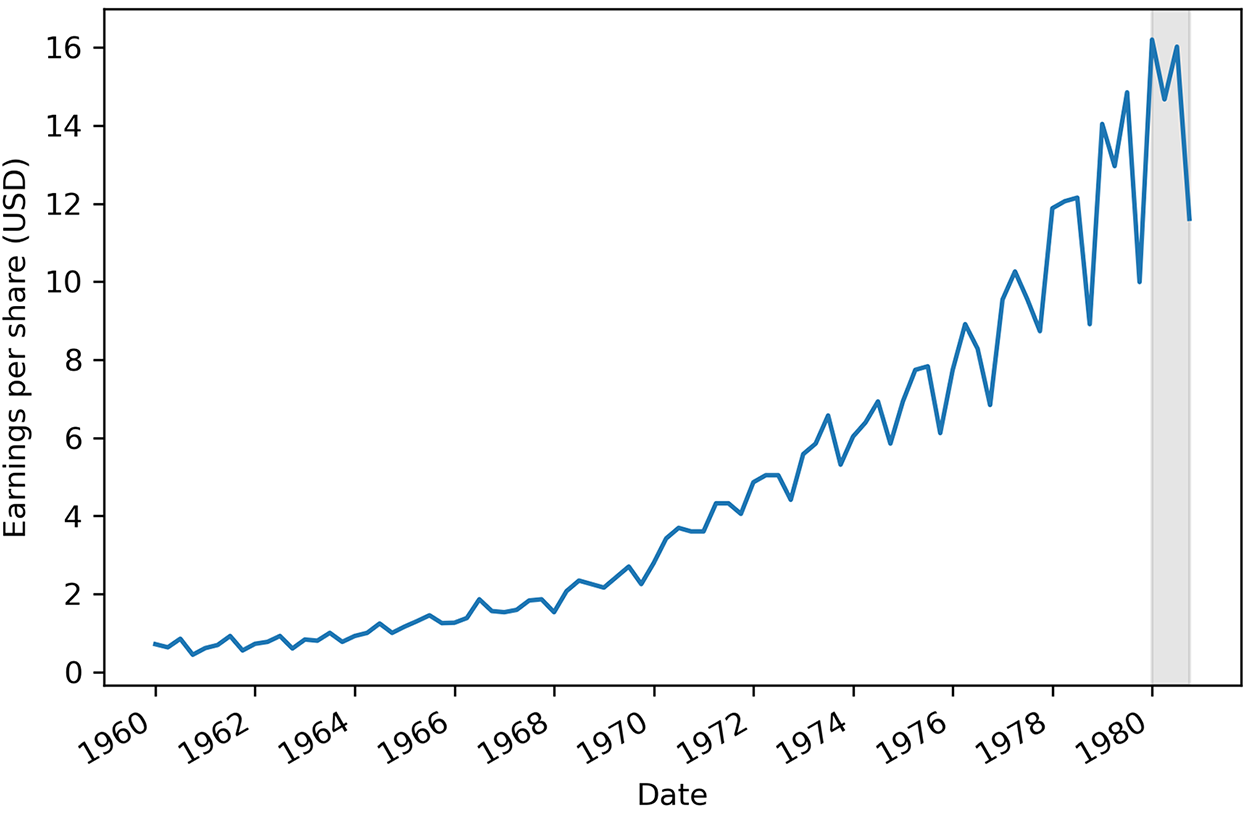

## **Predicción ingenua del futuro**

+ *Puedes ver en la figura 2.1 que nuestros datos tienen una tendencia, ya que va aumentando con el tiempo. Además, tenemos un patrón estacional, ya que a lo largo de un año, o cuatro trimestres, podemos observar picos y valles repetidamente. Esto significa que tenemos estacionalidad.*

+ Recuerde que identificamos cada uno de estos componentes cuando descompusimos nuestra serie temporal en el capítulo 1.
+ Los componentes se muestran en la figura 2.2.
+ Estudiaremos algunos de estos componentes en detalle más adelante en este capítulo, ya que nos ayudarán a obtener cierta intuición sobre el comportamiento de los datos, lo que a su vez nos ayudará a desarrollar un buen modelo de referencia.

**Figura 2.2 Descomposición de las ganancias trimestrales de Johnson & Johnson de 1960 a 1980**

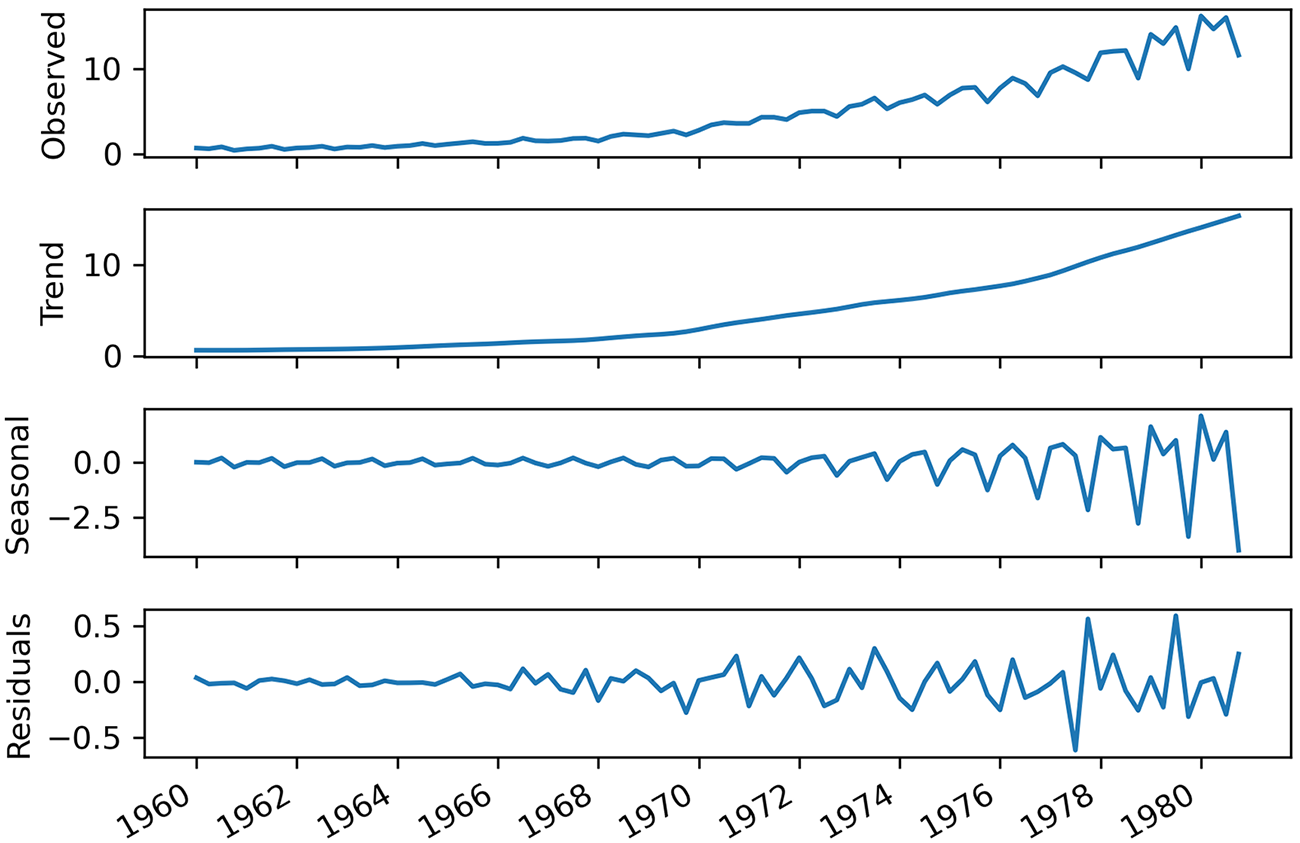

+ Primero definiremos qué es un modelo de referencia y luego desarrollaremos cuatro líneas de base diferentes para pronosticar el BPA trimestral de Johnson & Johnson. Este es el momento en que finalmente nos ensuciaremos las manos con Python y el pronóstico de series de tiempo.

# **2.1 Definición de un modelo de referencia**
+ **El modelo de referencia** es una solución trivial a nuestro problema.
+ A menudo utiliza heurísticas o estadísticas simples para generar predicciones.
+ *El modelo de referencia es la solución más simple que se pueda imaginar: no debería requerir ninguna capacitación y el costo de implementación debería ser muy bajo.*

+ ¿Puedes pensar en una línea de base para nuestro proyecto?
Sabiendo que queremos pronosticar *el BPA de Johnson & Johnson*, ¿cuál es el pronóstico más básico y más ingenuo que puede hacer?

+ En el contexto de las series de tiempo, una estadística simple que podemos utilizar para construir una línea de base es la **media aritmética**.
+ **Simplemente podemos calcular la media de los valores durante un período determinado y suponer que los valores futuros serán iguales a esa media.**
+ En el contexto de predecir las ganancias por acción de Johnson & Johnson, esto es como decir *el EPS promedio entre 1960 y 1979 fue de 4,31 dólares. Por lo tanto, espero que la UPA durante los próximos cuatro trimestres de 1980 sea igual a 4,31 dólares por trimestre.*

+ Otra posible base de referencia es pronosticar ingenuamente el **último punto de datos registrado**.
+ En nuestro contexto, esto sería como decir *Si el EPS es de $0,71$ para este trimestre, entonces el EPS también será de $0,71$ para el próximo trimestre.*

+ O, **si vemos un patrón cíclico en nuestros datos, podemos simplemente repetir ese patrón en el futuro**.
+ Siguiendo el contexto de Johnson & Johnson, esto es como decir, *Si la UPA es de $14,04$ dolares para el primer trimestre de 1979, entonces la UPA para el primer trimestre de 1980 también será de  $14,04$ dolares*

+ Puede ver que estas tres posibles líneas de base se basan en estadísticas, heurísticas y patrones simples observados en nuestro conjunto de datos.

## **Modelo de referencia**
+ Un modelo de referencia es una solución trivial a su problema de pronóstico. Se basa en heurísticas o estadísticas simples y suele ser la solución más sencilla. No requiere ajuste del modelo y es fácil de implementar.

+ Quizás se pregunte si esos modelos básicos son buenos.
+ ¿Qué tan bien pueden esos métodos simples predecir el futuro?
+ Podemos responder a esta pregunta pronosticando para el año 1980 y contrastando nuestros pronósticos con los datos observados en 1980.
+ A esto se le llama pronóstico fuera de muestra porque estamos haciendo predicciones para un período que no se tuvo en cuenta cuando se desarrolló el modelo.
+ De esa manera podemos medir el desempeño de nuestros modelos y ver cómo se comportarían cuando pronosticáramos más allá de los datos que tenemos, que en este caso son 1981 y posteriores.

+ En las siguientes secciones, aprenderá cómo desarrollar las diferentes líneas de base mencionadas aquí para predecir las EPS trimestrales deJohnson y Johnson.



# **2.2 Previsión de la media histórica**
+ Como se mencionó al principio del capítulo, vamos a trabajar con las EPS trimestrales en dólares estadounidenses (USD) de Johnson & Johnson de 1960 a 1980.
+ Nuestro objetivo es utilizar los datos desde 1960 hasta finales de 1979 para predecir los cuatro trimestres de 1980.
+ La primera línea de base que analizaremos utiliza la media histórica, que es la media aritmética de los valores pasados.
+ Su implementación es sencilla: **calcule la media del conjunto de entrenamiento y será nuestra predicción para los cuatro trimestres de 1980.**
+ Sin embargo, primero necesitamos hacer un trabajo preliminar que usaremos en todas nuestras implementaciones de referencia.




## **2.2.1 Configuración para implementaciones de referencia**
+ **Paso 1. Cargar las librerias necesarias**.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

+ **Paso 2. Cargar los datos**.

In [ ]:
df = pd.read_csv('/content/datos.csv', delimiter = ',')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


+ **Paso 3. Extraemos los años de date**.

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


**Figura 2.3 Las primeras cinco entradas de ganancias trimestrales por acción para el conjunto de datos de Johnson & Johnson. Observe cómo nuestro DataFrame tiene dos columnas: fecha y datos. También tiene índices de fila que comienzan en 0.**

In [ ]:
df.head()

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961


**Figura 2.4 Las últimas cinco entradas de nuestro conjunto de datos. Aquí podemos ver los cuatro trimestres de 1980 que intentaremos predecir utilizando diferentes modelos de referencia. Compararemos nuestros pronósticos con los datos observados en 1980 para evaluar el desempeño de cada línea de base.**

In [ ]:
df.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


**En la figura 2.4 vemos los cuatro trimestres de 1980, que es lo que intentaremos pronosticar utilizando nuestros modelos de referencia. Evaluaremos el desempeño de nuestras líneas de base comparando nuestros pronósticos con los valores de la columna de datos para los cuatro trimestres de 1980. Cuanto más cerca estén nuestros pronósticos de los valores observados, mejor.**

**Paso 4. data train y data test**.
+ El último paso antes de desarrollar nuestros modelos de referencia es dividir el conjunto de datos en conjuntos de train y de test.
+ Como se mencionó anteriormente, el conjunto de entrenamiento (train) constará de los datos desde 1960 hasta finales de 1979, y el conjunto de pruebas constará de los cuatro trimestres de 1980.
+ El conjunto de trenes será la única información que utilicemos para desarrollar nuestros modelos.
+ Una vez que se construye un modelo, pronosticaremos los próximos cuatro pasos de tiempo, que corresponderán a los cuatro trimestres de 1980 en nuestro conjunto de prueba.
+ De esa manera, podemos comparar nuestros pronósticos con los datos observados y evaluar el desempeño de nuestras líneas de base.
+ Para hacer la división, especificaremos que nuestro conjunto de trenes contendrá todos los datos contenidos df excepto las últimas cuatro entradas.
+ El conjunto de prueba estará compuesto únicamente por las últimas cuatro entradas.
+ Esto es lo que el siguiente bloque de código:

In [ ]:
train = df[:-4]
test = df[-4:]

## **2.2.2 Implementación de la línea base de la media histórica**
+ AhoraEstamos listos para implementar nuestra línea de base. Primero usaremos la media aritmética de todo el conjunto de trenes.
+ Para calcular la media, usaremos la numpy, ya que es un paquete muy rápido para computación científica en Python que funciona muy bien

In [ ]:
import numpy as np

historical_mean = np.mean(train['data'])

print(f'La media historica es {historical_mean}')

La media historica es 4.308499987499999


+ **Esto da un valor de 4,31 USD. Esto significa que desde 1960 hasta finales de 1979, el beneficio por acción trimestral de Johnson & Johnson fue de 4,31 dólares en promedio.**

+ Ahora pronosticaremos ingenuamente este valor para cada trimestre de 1980.
+ Para hacerlo, simplemente crearemos una nueva columna, pred_mean, que contiene la media histórica del conjunto de entrenamiento como pronóstico:

In [ ]:
test.loc[:, 'pred_mean'] = historical_mean

## **El Error Prcentual Absoluto Medio (MAPE)**
+ A continuación, debemos definir y calcular una métrica de error para evaluar el desempeño de nuestros pronósticos en el conjunto de prueba.
+ En este caso, utilizaremos el error porcentual absoluto medio (MAPE).
+ Es una medida de precisión de predicción para métodos de pronóstico que es fácil de interpretar e independiente de la escala de nuestros datos.
+ Esto significa que ya sea que estemos trabajando con valores de dos dígitos o de seis dígitos, el MAPE siempre se expresará como un porcentaje.
+ Por lo tanto, el MAPE devuelve el porcentaje de cuánto se desvían los valores previstos de los valores observados o reales en promedio, ya sea que la predicción fuera mayor o menor que los valores observados.
+ El MAPE se define en la ecuación 2.1.

$$MAPE=\frac{1}{n}\sum\limits_{i=1}^{n}\left\vert \frac{A_{i}-F_{i}}{A_{i}}\right\vert \times 100$$

+ En la ecuación 2.1,
  + $A_i$ es el valor real en el punto i en el tiempo, y
  + $F_i$ es el valor previsto en el punto i en el tiempo;
  + $n$ es simplemente el número de pronósticos.
+ En nuestro caso, debido a que estamos pronosticando los cuatro trimestres de 1980, n = 4.
+ Dentro de la suma, el valor pronosticado se resta del valor real y ese resultado se divide por el valor real, lo que nos da el error porcentual.
+ Luego tomamos el valor absoluto del error porcentual.
+ Esta operación se repite para cada uno de los $n$ puntos en el tiempo y los resultados se suman.
+ Finalmente, dividimos la suma por $n$ , el número de puntos en el tiempo, lo que efectivamente nos da el error porcentual absoluto medio.

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
print(f'El error porcentual MAPE = {round(mape_hist_mean,1)}%')

El error porcentual MAPE = 70.0%


+ Al ejecutar la función se obtiene un MAPE del 70,00%.
+ Esto significa que nuestra línea de base se desvía en un 70% en promedio del EPS trimestral observado de Johnson & Johnson en 1980.

+ Visualicemos nuestros pronósticos para comprender mejor nuestro MAPE del 70%.

**Figura 2.5 Las últimas cinco entradas de nuestro conjunto de datos**

In [ ]:
df.tail()

,date,data,year
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980
83,1980-10-01,11.61,1980


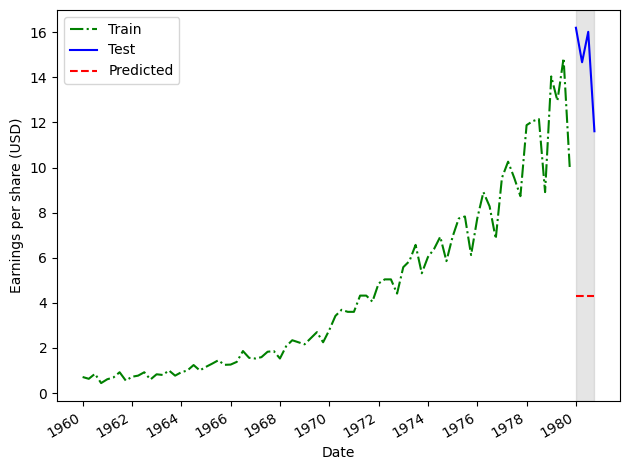

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

**Figura 2.6 Predicción de la media histórica como línea de base. Puede ver que la predicción está lejos de los valores reales en el conjunto de prueba. Esta línea de base da un MAPE del 70%.**

## **¿qué podemos aprender de ello?**
+ Aún así, ¿qué podemos aprender de ello?
+ Si observamos nuestro conjunto de entrenamiento, podemos ver una tendencia positiva, ya que el EPS aumenta con el tiempo.
+ Esto se ve respaldado aún más por el componente de tendencia que surge de la descomposición de nuestro conjunto de datos, que se muestra en la figura 2.7.

**Figura 2.7 Componente de tendencia de nuestra serie temporal. Puedes ver que tenemos una tendencia positiva en nuestros datos, ya que aumenta con el tiempo.**

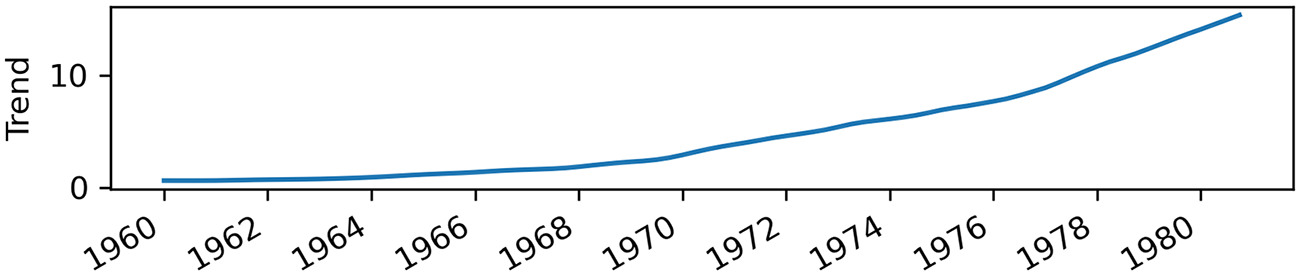

+ Como podemos ver, no sólo tenemos una tendencia, sino que la tendencia no es constante entre 1960 y 1980: se está volviendo más pronunciada.
+ Por lo tanto, podría ser que la EPS observada en 1960 no prediga la EPS de 1980, porque tenemos una tendencia positiva y los valores de la EPS aumentan con el tiempo y lo hacen a un ritmo más rápido.

## **¿Puedes mejorar nuestra línea de base?**
+ Antes de pasar a la siguiente sección, ¿se le ocurre alguna forma de mejorar nuestra línea de base sin dejar de utilizar la media?
+ ¿Cree que sería útil tomar la media de un período de tiempo más corto y más reciente (de 1970 a 1979, por ejemplo)?

# **2.3 Previsión de la media del año pasado**
+ La lección aprendida de la línea de base anterior es que los valores anteriores no parecen predecir valores futuros a largo plazo debido al componente de tendencia positiva en nuestro conjunto de datos.
+ Los valores anteriores parecen demasiado pequeños para ser representativos del nuevo nivel que alcanza la EPS hacia finales de 1979 y en adelante hasta 1980.

+ ¿Qué pasa si utilizamos la media del último año en nuestro conjunto de entrenamiento para pronosticar el año siguiente?
+ Esto significa que calcularíamos el EPS promedio en 1979 y lo pronosticaríamos para cada trimestre de 1980; los valores más recientes que han aumentado con el tiempo deberían estar potencialmente más cerca de lo que se observará en 1980.
+ Por ahora, esto es simplemente una hipótesis. Así que implementemos esta línea base y probémosla para ver cómo funciona.

+ Nuestros datos ya están divididos en conjuntos de trenes y de prueba (hecho en la sección 2.2.1), por lo que podemos seguir adelante y calcular la media del último año en el conjunto de trenes, que corresponde a los últimos cuatro puntos de datos en 1979:

In [ ]:
last_year_mean = np.mean(train.data[-4:])

print(f'La media del último año es {last_year_mean}')

La media del último año es 12.96


+ Esto nos da un BPA promedio de 12,96 dólares.
+ Por lo tanto, predeciremos que Johnson & Johnson tendrá una EPS de $12,96 para los cuatro trimestres de 1980.
+ Utilizando el mismo procedimiento que utilizamos para la línea de base anterior, crearemos una nueva columna pred_last_yr_mean para mantener la media del año pasado como nuestras predicciones:

In [ ]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

+ Luego, usando la función MAPE que definimos anteriormente, podemos evaluar el desempeño de nuestra nueva línea de base.
+ Recuerde que el primer parámetro son los valores observados, que se mantienen en el conjunto de prueba.
+ Luego pasamos los valores previstos, que se encuentran en la columna pred_last_yr_mean:

In [ ]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
print(f'MAPE = {round(mape_last_year_mean,1)}%')

MAPE = 15.6%


**Figura 2.8 Predicción de la media del último año en el conjunto de entrenamiento (1979) como modelo de referencia. Puede ver que la predicción está más cerca de los valores reales del conjunto de prueba en comparación con la línea de base anterior que construimos en la figura 2.6.**

La media historica es 12.96


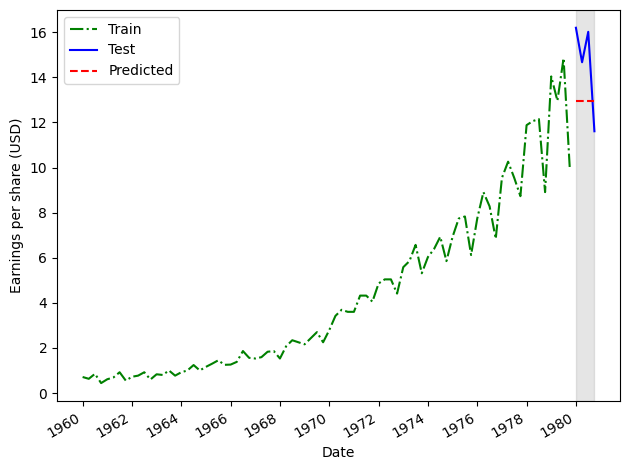

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


last_year_mean = np.mean(train.data[-4:])
test.loc[:, 'pred_mean'] = last_year_mean

print(f'La media historica es {last_year_mean}')
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

+ Esta nueva línea base es una clara mejora con respecto a la anterior, aunque su implementación es igual de sencilla, ya que disminuimos el MAPE del 70% al 15,6%.
+ Esto significa que nuestras previsiones se desvían de los valores observados en un 15,6% de media.
+ Utilizar la media del año pasado es un buen paso en la dirección correcta.
+ Queremos obtener un MAPE lo más cercano posible al 0%, ya que eso se traduciría en predicciones más cercanas a los valores reales en nuestro horizonte de pronóstico.
+ Podemos aprender de esta línea de base que los valores futuros probablemente dependan de valores pasados ​​que no están muy atrás en la historia.
+ Esta es una señal de autocorrelación y profundizaremos en este tema en el capítulo 5.
+ Por ahora, veamos otra línea de base que podríamos desarrollar para esta situación.

# **2.4 Predecir utilizando el último valor conocido**
+ Utilizamos la media en diferentes períodos para desarrollar un modelo de referencia.
+ Hasta ahora, la mejor línea de base ha sido la media del último año registrado en nuestro conjunto de entrenamiento, ya que arrojó el MAPE más bajo.
+ A partir de esa línea de base aprendimos que los valores futuros dependen de los valores pasados, pero no de aquellos que se remontan demasiado atrás en el tiempo.
+ De hecho, predecir la EPS media de 1960 a 1979 arrojó peores pronósticos que predecir la EPS media durante 1979.

+ Por lo tanto, podríamos suponer que usar el último valor conocido del conjunto de entrenamiento como modelo de referencia nos dará pronósticos aún mejores, lo que se traduciría en un MAPE más cercano al 0%. Probemos esa hipótesis.

+ El primer paso es extraer el último valor conocido de nuestro conjunto de trenes, que corresponde al EPS registrado en el último trimestre de 1979:

In [ ]:
last = train.data.iloc[-1]

print(f'El último dato observado en el entrenamiento es {last}')

El último dato observado en el entrenamiento es 9.99


+ Cuando recuperamos el EPS registrado durante el último trimestre de 1979, obtenemos un valor de 9,99 dólares.
+ Por lo tanto, predeciremos que Johnson & Johnson tendrá una utilidad por acción de $9,99 durante los cuatro trimestres de 1980.

+ Nuevamente, agregaremos una nueva columna llamada pred_last para contener las predicciones.

In [ ]:
test.loc[:, 'pred_last'] = last

+ Luego, usando la misma función MAPE que definimos anteriormente, podemos evaluar el desempeño de este nuevo modelo de referencia.
+ Nuevamente, pasamos a la función los valores reales del conjunto de prueba y nuestra predicción de la columna pred_last de test:

In [ ]:
mape_last = mape(test['data'], test['pred_last'])
print(f'MAPE = {round(mape_last,1)}%')


MAPE = 30.5%


+ Esto nos da un MAPE del 30,45%. Podemos visualizar las previsiones en la figura 2.9.

**Figura 2.9 Predicción del último valor conocido del conjunto de trenes como modelo de referencia. Podemos ver que esta línea de base, con un MAPE del 30,45%, es mejor que nuestra primera línea de base, pero tiene menos rendimiento que la segunda**

La media historica es 9.99


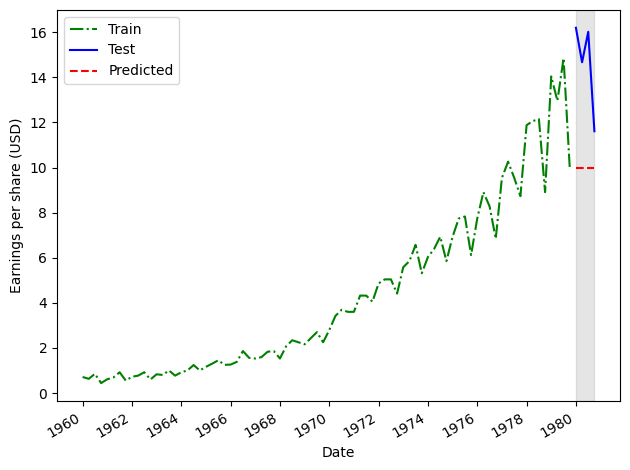

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


last_year_mean = np.mean(train.data[-4:])
test.loc[:, 'pred_mean'] = last

print(f'La media historica es {last}')
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

+ Parece que nuestra nueva hipótesis no mejoró la última línea de base que construimos, ya que tenemos un MAPE del 30,45%, mientras que logramos un MAPE del 15,60% utilizando la EPS media durante 1979.
+ Por lo tanto, estos nuevos pronósticos están más lejos de los valores observados en 1980.


+ Esto puede explicarse por el hecho de que el EPS muestra un comportamiento cíclico, donde es alto durante los primeros tres trimestres y luego cae en el último trimestre.
+ Usar el último valor conocido no tiene en cuenta la estacionalidad, por lo que necesitamos usar otra técnica de pronóstico ingenua para ver si podemos producir un mejorbase.

# **2.5 Implementación del pronóstico estacional ingenuo**
+ Consideramos el componente de tendencia para las dos primeras líneas de base de este capítulo, pero no hemos estudiado otro componente importante de nuestro conjunto de datos, que es el componente estacional que se muestra en la figura 2.10.
+ Hay patrones cíclicos claros en nuestros datos, y esa es una información que podríamos utilizar para construir una última línea de base: **el ingenuo pronóstico estacional**.

**Figura 2.10 Componente estacional de nuestra serie temporal. Aquí podemos ver fluctuaciones periódicas, que indican la presencia de estacionalidad.**

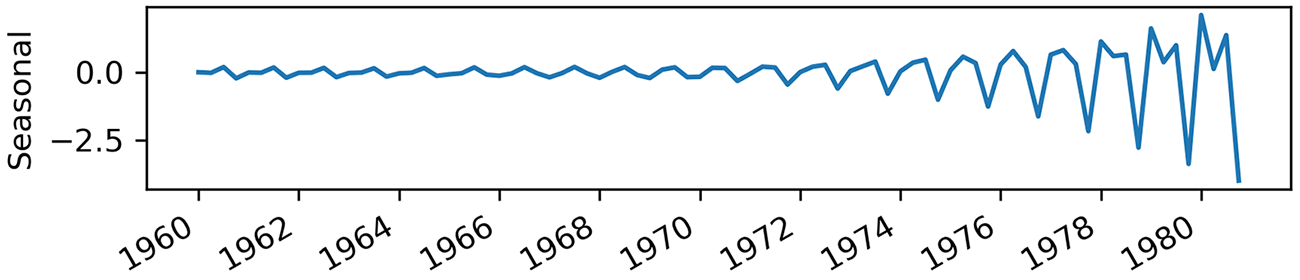

## **El ingenuo pronóstico estacional**
+ El ingenuo pronóstico estacional toma el último ciclo observado y lo repite en el futuro.
+ En nuestro caso, un ciclo completo ocurre en cuatro trimestres, por lo que tomaremos la EPS del primer trimestre de 1979 y predeciremos ese valor para el primer trimestre de 1980.
+ Luego tomaremos la EPS del segundo trimestre de 1979 y predeciremos ese valor para el segundo trimestre de 1980.
+ Este proceso se repetirá para el tercer y cuarto trimestre.

+ En Python, podemos implementar esta línea base simplemente tomando los últimos cuatro valores del conjunto de trenes, que corresponden a los cuatro trimestres de 1979, y asignándolos a los trimestres correspondientes en 1980.
+ El siguiente código agrega la columna pred_last_season para mantener nuestras predicciones. del ingenuo método de pronóstico estacional:

In [ ]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
test

,date,data,year,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,1980,9.99,12.96,9.99,14.04
81,1980-04-01,14.67,1980,9.99,12.96,9.99,12.96
82,1980-07-02,16.02,1980,9.99,12.96,9.99,14.85
83,1980-10-01,11.61,1980,9.99,12.96,9.99,9.99


**Luego calculamos el MAPE de la misma manera que hicimos en las secciones anteriores:**

In [ ]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
print(f'MAPE = {round(mape_naive_seasonal,1)}%')


MAPE = 11.6%


+ Esto nos da un MAPE de 11,56%, que es el MAPE más bajo de todas las líneas de base de este capítulo.
+ La Figura 2.11 ilustra nuestro pronóstico en comparación con los datos observados en el conjunto de prueba.
+ Como ejercicio, te sugiero encarecidamente que intentes recrearlo por tu cuenta.
+ Como puede ver, nuestro ingenuo pronóstico estacional resultó en el MAPE más bajo de todas las líneas de base que construimos en este capítulo.
+ Esto significa que la estacionalidad tiene un impacto significativo en los valores futuros, ya que repetir la última temporada en el futuro produce pronósticos bastante precisos.
+ Intuitivamente, esto tiene sentido, porque podemos observar claramente un patrón cíclico que se repite cada año en el gráfico 2.11.
+ Habrá que considerar los efectos estacionales cuando desarrollemos un modelo de pronóstico más complejo para este problema.
+ Explicaré en detalle cómo contabilizarlos en Capítulo 8.

**Figura 2.11 Resultado del pronóstico estacional ingenuo en el conjunto de prueba. Este pronóstico es más similar a los datos observados en el conjunto de prueba y resultó en el MAPE más bajo. Claramente, la estacionalidad de este conjunto de datos tiene un impacto en los valores futuros y debe tenerse en cuenta al realizar pronósticos.**

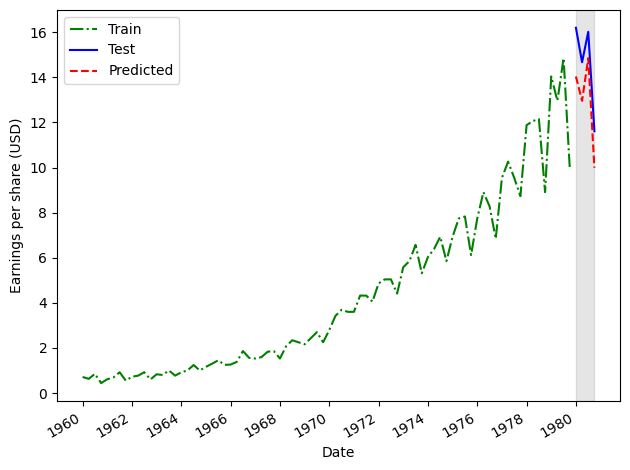

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.savefig('figures', dpi=300)

# **2.6 Próximos pasos**
+ En este capítulo, desarrollamos cuatro líneas de base diferentes para nuestro proyecto de pronóstico.
+ Usamos la media aritmética de todo el conjunto de entrenamiento, la media del último año en el conjunto de trenes, el último valor conocido del conjunto de trenes y un pronóstico estacional ingenuo.
+ Luego, cada línea de base se evaluó en un conjunto de prueba utilizando la métrica MAPE.
+ La Figura 2.12 resume el MAPE de cada línea de base que desarrollamos en este capítulo.
+ Como puede ver, la línea de base que utiliza el pronóstico estacional ingenuo tiene el MAPE más bajo y, por lo tanto, el mejor rendimiento.

**Figura 2.12 El MAPE de las cuatro líneas de base desarrolladas en este capítulo. Cuanto menor sea el MAPE, mejor será la línea de base; por lo tanto, elegiremos la línea base estacional ingenua como punto de referencia y la compararemos con nuestros modelos más complejos.**

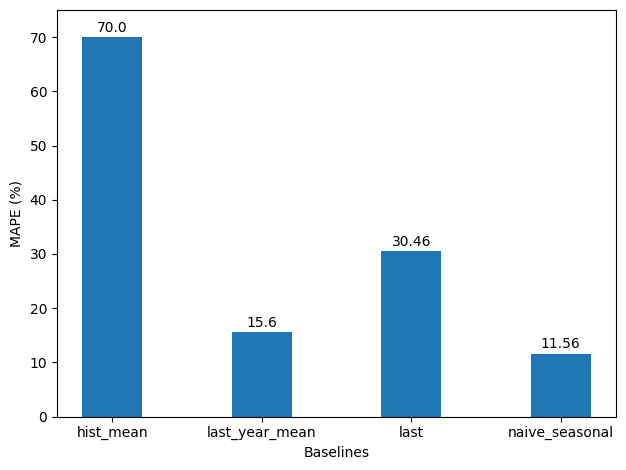

In [ ]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

plt.savefig('figures', dpi=300)

+ Tenga en cuenta que un modelo de referencia sirve como base de comparación.
+ Desarrollaremos modelos más complejos aplicando aprendizaje estadístico o técnicas de aprendizaje profundo, y cuando evaluemos nuestras soluciones más complejas frente al conjunto de pruebas y registremos nuestras métricas de error, podremos compararlas con las de la línea de base.
+ En nuestro caso, compararemos el MAPE de un modelo complejo con el MAPE de nuestro ingenuo pronóstico estacional.
+ Si el MAPE de un modelo complejo es inferior al 11,56%, entonces sabremos que tenemos un modelo con mejor rendimiento.

+ Habrá situaciones especiales en las que una serie temporal sólo podrá pronosticarse utilizando métodos ingenuos.
+ Estos son casos especiales en los que el proceso se mueve al azar y no se puede predecir utilizando métodos de aprendizaje estadístico.
+ Esto significa que estamos en presencia de un paseo aleatorio; lo examinaremos en el próximo capítulo.

# **Resumen**
+ El pronóstico de series de tiempo comienza con un modelo de referencia que sirve como punto de referencia para comparar con modelos más complejos.
+ Un modelo de referencia es una solución trivial a nuestro problema de pronóstico porque sólo utiliza heurísticas o estadísticas simples, como la media.
+ MAPE significa error porcentual absoluto medio y es una medida intuitiva de cuánto se desvía un valor predicho del valor real.
Hay muchas maneras de desarrollar una línea de base.
+ En este capítulo, vio cómo usar la media, el último valor conocido o el últimoestación.